<a href="https://colab.research.google.com/github/daixjaz/movie_info_correlation/blob/main/python_movies.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# importing libraries
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

In [2]:
# read in data
df =  pd.read_csv('/content/drive/MyDrive/Python_project/movies.csv')
df.head()

name  ... runtime
0                                     The Shining  ...   146.0
1                                 The Blue Lagoon  ...   104.0
2  Star Wars: Episode V - The Empire Strikes Back  ...   124.0
3                                       Airplane!  ...    88.0
4                                      Caddyshack  ...    98.0

[5 rows x 15 columns]

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7668 entries, 0 to 7667
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      7668 non-null   object 
 1   rating    7591 non-null   object 
 2   genre     7668 non-null   object 
 3   year      7668 non-null   int64  
 4   released  7666 non-null   object 
 5   score     7665 non-null   float64
 6   votes     7665 non-null   float64
 7   director  7668 non-null   object 
 8   writer    7665 non-null   object 
 9   star      7667 non-null   object 
 10  country   7665 non-null   object 
 11  budget    5497 non-null   float64
 12  gross     7479 non-null   float64
 13  company   7651 non-null   object 
 14  runtime   7664 non-null   float64
dtypes: float64(5), int64(1), object(9)
memory usage: 898.7+ KB


In [4]:
# looking for missing data

for col in df.columns: # forloop "for every column"
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col,pct_missing))

name - 0.0%
rating - 0.010041731872717789%
genre - 0.0%
year - 0.0%
released - 0.0002608242044861763%
score - 0.0003912363067292645%
votes - 0.0003912363067292645%
director - 0.0%
writer - 0.0003912363067292645%
star - 0.00013041210224308815%
country - 0.0003912363067292645%
budget - 0.2831246739697444%
gross - 0.02464788732394366%
company - 0.002217005738132499%
runtime - 0.0005216484089723526%


In [5]:
df['rating'].value_counts()

R            3697
PG-13        2112
PG           1252
Not Rated     283
G             153
Unrated        52
NC-17          23
TV-MA           9
TV-PG           5
X               3
Approved        1
TV-14           1
Name: rating, dtype: int64

In [6]:
# data types for columns
df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [7]:
# reassigning data types
#df['budget'] = df['budget'].astype('int64')
#df['gross'] = df['gross'].astype('int64')

In [8]:
# changing the float to an integer 
df['budget'] = df['budget'].astype('Int64')

In [9]:
# 'budget' no longer contains a decimal
df.head(2)

name rating      genre  ...       gross            company  runtime
0      The Shining      R      Drama  ...  46998772.0       Warner Bros.    146.0
1  The Blue Lagoon      R  Adventure  ...  58853106.0  Columbia Pictures    104.0

[2 rows x 15 columns]

In [10]:
# double checking my dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7668 entries, 0 to 7667
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      7668 non-null   object 
 1   rating    7591 non-null   object 
 2   genre     7668 non-null   object 
 3   year      7668 non-null   int64  
 4   released  7666 non-null   object 
 5   score     7665 non-null   float64
 6   votes     7665 non-null   float64
 7   director  7668 non-null   object 
 8   writer    7665 non-null   object 
 9   star      7667 non-null   object 
 10  country   7665 non-null   object 
 11  budget    5497 non-null   Int64  
 12  gross     7479 non-null   float64
 13  company   7651 non-null   object 
 14  runtime   7664 non-null   float64
dtypes: Int64(1), float64(4), int64(1), object(9)
memory usage: 906.2+ KB


In [11]:
# dropping all rows that contain null values
df.dropna(inplace=True)

In [12]:
# changing the dtype from float to int
df['budget'] = df['budget'].astype('int64')
df['gross'] = df['gross'].astype('int64')

In [13]:
# double checking to see if it worked, 'gross' is no longer showing a decimal
df.head(2)

name rating      genre  ...     gross            company  runtime
0      The Shining      R      Drama  ...  46998772       Warner Bros.    146.0
1  The Blue Lagoon      R  Adventure  ...  58853106  Columbia Pictures    104.0

[2 rows x 15 columns]

In [14]:
df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget        int64
gross         int64
company      object
runtime     float64
dtype: object

In [20]:
# creating a correct year column 
df['yearcorrect'] = df['released'].astype(str).str[:4]
df

name  ... yearcorrect
0                                        The Shining  ...        June
1                                    The Blue Lagoon  ...        July
2     Star Wars: Episode V - The Empire Strikes Back  ...        June
3                                          Airplane!  ...        July
4                                         Caddyshack  ...        July
...                                              ...  ...         ...
7648                               Bad Boys for Life  ...        Janu
7649                              Sonic the Hedgehog  ...        Febr
7650                                        Dolittle  ...        Janu
7651                            The Call of the Wild  ...        Febr
7652                               The Eight Hundred  ...        Augu

[5421 rows x 16 columns]

In [16]:
# sorting movies by top 'gross'
df.sort_values(by=['gross'], inplace=False, ascending=False)

name  ... yearcorrect
5445                                      Avatar  ...        Dece
7445                           Avengers: Endgame  ...        Apri
3045                                     Titanic  ...        Dece
6663  Star Wars: Episode VII - The Force Awakens  ...        Dece
7244                      Avengers: Infinity War  ...        Apri
...                                          ...  ...         ...
5640                                 Tanner Hall  ...        Janu
2434                  Philadelphia Experiment II  ...        June
3681                                Ginger Snaps  ...        May 
272                                     Parasite  ...        Marc
3203                                  Trojan War  ...        Octo

[5421 rows x 16 columns]

In [17]:
pd.set_option('display.max_rows', None)

In [18]:
# drop any duplicates
df['company'].drop_duplicates().sort_values(ascending=False)

7129                                              thefyzz
5664                                          micro_scope
4007                                             i5 Films
6793                                           i am OTHER
6420                                                 erbp
3776                                       double A Films
3330                          Zucker Brothers Productions
146                                      Zoetrope Studios
2213                                   Zeta Entertainment
3698                              Zentropa Entertainments
1180                                 Zenith Entertainment
5180                                      Zazen Produções
1321                             Zanuck/Brown Productions
1329                          Zacharias-Buhai Productions
789                             Young Sung Production Co.
5125                           Young Hannibal Productions
5499                                          Yellow Bird
4618          

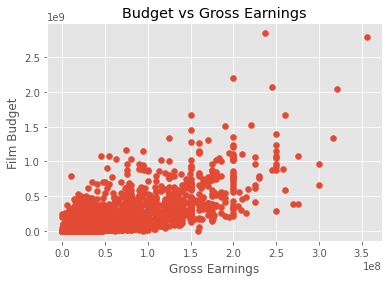

In [19]:
# scatter plot with budget vs, gross 

plt.scatter(x=df['budget'],y=df['gross'])
plt.title('Budget vs Gross Earnings')
plt.xlabel('Gross Earnings')
plt.ylabel('Film Budget')
plt.show()

In [20]:
df.head()

name rating  ... runtime  yearcorrect
0                                     The Shining      R  ...   146.0         June
1                                 The Blue Lagoon      R  ...   104.0         July
2  Star Wars: Episode V - The Empire Strikes Back     PG  ...   124.0         June
3                                       Airplane!     PG  ...    88.0         July
4                                      Caddyshack      R  ...    98.0         July

[5 rows x 16 columns]

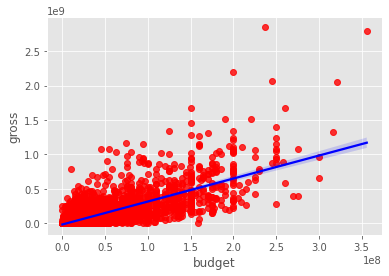

In [21]:
# plot budget vs. gross using seaborn
sns.regplot(x='budget', y='gross', data=df, scatter_kws={"color": "red"}, line_kws={"color": "blue"})

In [22]:
# looking at correlation; high between budget and gross
df.corr(method='pearson') 

year     score     votes    budget     gross   runtime
year     1.000000  0.056386  0.206021  0.327722  0.274321  0.075077
score    0.056386  1.000000  0.474256  0.072001  0.222556  0.414068
votes    0.206021  0.474256  1.000000  0.439675  0.614751  0.352303
budget   0.327722  0.072001  0.439675  1.000000  0.740247  0.318695
gross    0.274321  0.222556  0.614751  0.740247  1.000000  0.275796
runtime  0.075077  0.414068  0.352303  0.318695  0.275796  1.000000

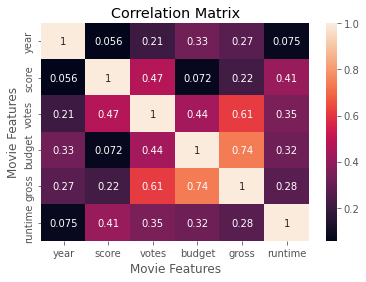

In [23]:
correlation_matrix = df.corr(method='pearson')

sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Matrix')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')
plt.show()

In [24]:
# 'compamy' to no longer be a string
df_numerized = df
for col_name in df_numerized.columns:
  if(df_numerized[col_name].dtype == 'object'):
    df_numerized[col_name] = df_numerized[col_name].astype('category')
    df_numerized[col_name] = df_numerized[col_name].cat.codes

df_numerized

name  rating  genre  year  ...       gross  company  runtime  yearcorrect
0     4692       6      6  1980  ...    46998772     1426    146.0           11
1     3929       6      1  1980  ...    58853106      452    104.0           10
2     3641       4      0  1980  ...   538375067      945    124.0           11
3      204       4      4  1980  ...    83453539     1108     88.0           10
4      732       6      4  1980  ...    39846344     1083     98.0           10
5     1509       6      9  1980  ...    39754601     1108     95.0           13
6     3930       6      0  1980  ...   115229890     1397    133.0           11
7     3122       6      3  1980  ...    23402427      390    129.0            7
8     3732       4      0  1980  ...   108185706      548    127.0           11
9     4401       6      3  1980  ...    15795189     1391    100.0           13
10     332       4      0  1980  ...    70687344     1338    116.0            7
11    4179       4      1  1980  ...    30031783      320    109.0           15
12    3029       4      1  1980  ...    49823037     1108    114.0            7
13    2859       6      6  1980  ...    54766923     1108    124.0           16
14    1208       6      5  1980  ...    31899000      661    104.0           10
15    3553       4      6  1980  ...     9709597     1184    103.0           15
17      66       4      4  1980  ...   103300686      815    109.0            7
18    4143       6      9  1980  ...    21448782       45     89.0            8
20     986       6      5  1980  ...    19814523      939    102.0            8
21    1762       6      1  1980  ...     3484523     1114    219.0            5
22    4128       4      0  1980  ...    16647800      306    103.0            6
23    5289       4      8  1980  ...    22762571     1397     96.0            6
28     700       6      5  1980  ...    37121708     1382    131.0           11
29     261       6      5  1980  ...    22743674     1108    117.0            8
33     785       4      6  1980  ...      534816      372     97.0            5
35    3068       6      4  1980  ...    69847348     1426    109.0           15
36    4245       6      4  1980  ...    10000000     1143     91.0           13
37    2618       6      4  1980  ...     6342668      337    101.0           15
42    4736       6      0  1980  ...     7063886      997    131.0           11
46    4312       6      0  1980  ...    15716828     1397    109.0           11
48    4512       4      0  1980  ...    14662035     1397     94.0           13
50    3648       4      4  1980  ...    10389003      859     89.0           16
51    2497       6      4  1980  ...     4309490     1397     95.0           16
53     692       4      0  1980  ...    24265659     1426    116.0           11
56    5193       4      0  1980  ...     3763988      841    121.0           12
57    2818       4      4  1980  ...     6216067     1023    103.0           10
58    4519       6      0  1980  ...    18971000      100    103.0            6
75    4351       1      1  1980  ...    11000000     1424     97.0           11
77    5240       6      4  1980  ...     4400000     1382    115.0            6
80    2971       6      6  1980  ...       59167      282     94.0           16
92    1973       4      0  1981  ...   389925971     1108    115.0           11
94     284       6      4  1981  ...    30669378     1147     97.0            6
95    1301       6      0  1981  ...    25244626       45     99.0           10
96    4100       2      9  1981  ...     2956630     1197     85.0            5
97    3031       6      4  1981  ...   111289673      158     94.0           12
98     603       6      5  1981  ...    12000000      661    108.0           10
99     861       4      0  1981  ...    41092328      389    118.0           11
100   1329       6      1  1981  ...    34971136      416    140.0            5
101   2389       6      0  1981  ...    23668369      883     96.0           13
103   

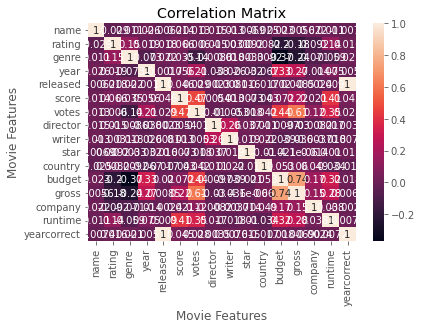

In [25]:
# company has a low correlation.
correlation_matrix = df_numerized.corr(method='pearson')

sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Matrix')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')
plt.show()

In [26]:
df_numerized.corr()

name    rating     genre  ...   company   runtime  yearcorrect
name         1.000000 -0.029234  0.010996  ...  0.021697  0.010850    -0.007371
rating      -0.029234  1.000000  0.147796  ... -0.092357  0.140792     0.015532
genre        0.010996  0.147796  1.000000  ... -0.071334 -0.059237     0.021306
year         0.025542  0.019499 -0.073167  ... -0.014333  0.075077    -0.005073
released    -0.006152  0.018083  0.022142  ... -0.002407  0.008975     0.996181
score        0.014450  0.065983  0.035106  ...  0.020656  0.414068     0.045136
votes        0.012615  0.006031 -0.135990  ...  0.118470  0.352303     0.027535
director     0.015246  0.014656 -0.008553  ... -0.008223  0.017433     0.003497
writer       0.012880 -0.003149  0.017578  ... -0.003697 -0.017561     0.007594
star        -0.006882  0.009196  0.003341  ...  0.014082  0.010108     0.014919
country     -0.025490  0.008230 -0.009164  ...  0.048569 -0.034477    -0.016957
budget       0.023392 -0.203946 -0.368523  ...  0.170235  0.318695     0.018328
gross        0.005639 -0.181906 -0.244101  ...  0.149553  0.275796     0.006873
company      0.021697 -0.092357 -0.071334  ...  1.000000  0.037585    -0.002361
runtime      0.010850  0.140792 -0.059237  ...  0.037585  1.000000     0.007167
yearcorrect -0.007371  0.015532  0.021306  ... -0.002361  0.007167     1.000000

[16 rows x 16 columns]

In [27]:
correlation_mat = df_numerized.corr()

corr_pairs = correlation_mat.unstack()

corr_pairs

name         name           1.000000
             rating        -0.029234
             genre          0.010996
             year           0.025542
             released      -0.006152
             score          0.014450
             votes          0.012615
             director       0.015246
             writer         0.012880
             star          -0.006882
             country       -0.025490
             budget         0.023392
             gross          0.005639
             company        0.021697
             runtime        0.010850
             yearcorrect   -0.007371
rating       name          -0.029234
             rating         1.000000
             genre          0.147796
             year           0.019499
             released       0.018083
             score          0.065983
             votes          0.006031
             director       0.014656
             writer        -0.003149
             star           0.009196
             country        0.008230
 

In [28]:
# linear way to view our pairs, still seeing correlation
sorted_pairs = corr_pairs.sort_values()

sorted_pairs

budget       genre         -0.368523
genre        budget        -0.368523
gross        genre         -0.244101
genre        gross         -0.244101
rating       budget        -0.203946
budget       rating        -0.203946
rating       gross         -0.181906
gross        rating        -0.181906
votes        genre         -0.135990
genre        votes         -0.135990
rating       company       -0.092357
company      rating        -0.092357
year         genre         -0.073167
genre        year          -0.073167
             company       -0.071334
company      genre         -0.071334
country      year          -0.066748
year         country       -0.066748
runtime      genre         -0.059237
genre        runtime       -0.059237
country      score         -0.043051
score        country       -0.043051
budget       writer        -0.039466
writer       budget        -0.039466
director     year          -0.038354
year         director      -0.038354
gross        writer        -0.035885
w

In [29]:
# quick view of higher correlation 

high_corr = sorted_pairs[(sorted_pairs) > 0.5]
high_corr

gross        votes          0.614751
votes        gross          0.614751
budget       gross          0.740247
gross        budget         0.740247
yearcorrect  released       0.996181
released     yearcorrect    0.996181
name         name           1.000000
company      company        1.000000
gross        gross          1.000000
budget       budget         1.000000
country      country        1.000000
star         star           1.000000
writer       writer         1.000000
director     director       1.000000
votes        votes          1.000000
score        score          1.000000
released     released       1.000000
year         year           1.000000
genre        genre          1.000000
rating       rating         1.000000
runtime      runtime        1.000000
yearcorrect  yearcorrect    1.000000
dtype: float64